In [1]:
import csv
import random

from miniml.mse import *
from miniml.helper import *

# MSE Regression

## Algebraic Method - Ordinary Least Squares (OLS)

**Linear Case**

In [2]:
N = 20
x = np.reshape(range(0, N), (-1, 1))
x = np.insert(x, 0, [1 for _ in range(N)], axis=1) # augmented notation
y = [random.uniform(per[1]+3, per[1]+5) for per in x]

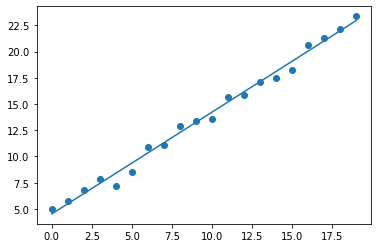

In [3]:
regressor = MSeRegressor(x, y)
regressor.fit(sol='algebra')

pred = regressor.predict(x)
plt.scatter(x[:,1], y)
_ = plt.plot(x[:,1], pred)

**Nonlinear Case**

In [4]:
N = 20
x = np.reshape(np.arange(0, N, 0.2), (-1, 1))
x = np.insert(x, 0, [1 for _ in range(len(x))], axis=1) # augmented notation
y = [np.sin(per[1]) for per in x]

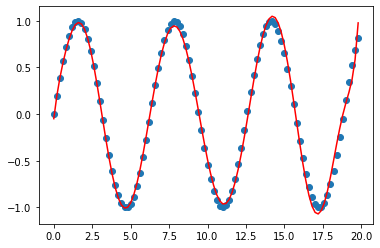

In [5]:
regressor = MSeRegressor(x, y)
regressor.fit(sol='algebra', kernel='polynomial', d=11)

pred = regressor.predict(x)
plt.scatter(x[:,1], y)
_ = plt.plot(x[:,1], pred, color='r')

## Gradient Descent Method - Least Mean Squares (LMS)

**Linear Case**

In [6]:
N = 20
x = np.reshape(range(0, N), (-1, 1))
x = np.insert(x, 0, [1 for _ in range(N)], axis=1) # augmented notation
y = [random.uniform(per[1]+3, per[1]+5) for per in x]

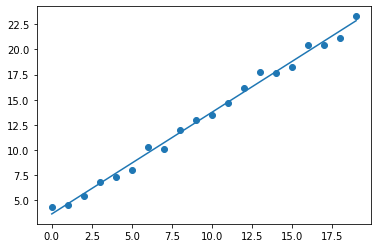

In [7]:
regressor = MSeRegressor(x, y)
regressor.fit(max_epoch=1000, sol='GD', lr=0.01)

pred = regressor.predict(x)
plt.scatter(x[:,1], y)
_ = plt.plot(x[:,1], pred)

**Nonlinear Case**

In [8]:
N = 20
x = np.reshape(np.arange(0, N, 0.2), (-1, 1))
x = np.insert(x, 0, [1 for _ in range(len(x))], axis=1) # augmented notation
y = [np.sin(per[1]) for per in x]

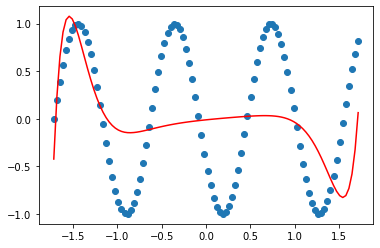

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_x = np.copy(x)
std_x[:,1:] = scaler.fit_transform(std_x[:,1:])

regressor = MSeRegressor(std_x, y)
regressor.fit(max_epoch=1000, sol='GD', kernel='polynomial', lr=0.001, d=11)

pred = regressor.predict(std_x)
plt.scatter(std_x[:,1], y)
_ = plt.plot(std_x[:,1], pred, color='r')

**Sin kernel function**

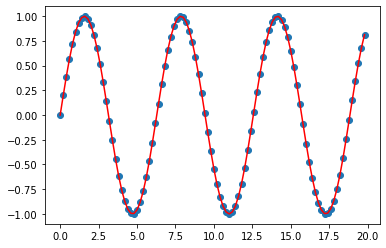

In [10]:
regressor = MSeRegressor(x, y)
regressor.fit(max_epoch=1000, sol='GD', kernel='sin', lr=0.01)

pred = regressor.predict(x)
plt.scatter(x[:,1], y)
_ = plt.plot(x[:,1], pred, color='r')

# MSE Classification

## Algebraic Method

**Linear Case**

In [11]:
data = []
z = []
with open('./datasets/synthetic1_train.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        p1, p2, label = row[0].split(',')
        p1, p2, label = float(p1), float(p2), int(label)
        data.append([1, p1, p2+5]) # augmented data
        z.append(label if label==1 else -1)
data = np.array(data)
z = np.array(z)
b = np.array([1 for _ in range(len(data))]) # b could be any as long as larger than zero

In [12]:
classifier = MSeClassifier(x=data, z=z, b=b)
_ = classifier.fit(sol='algebra')

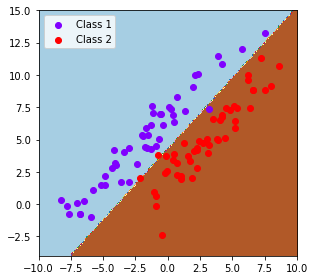

In [13]:
labels = np.copy(z)
labels[labels==1] = 0
labels[labels==-1] = 1
plotBoundByDecisionFunction(data, labels, classifier.predict, augmented=True)

**Nonlinear Case**

In [14]:
data = []
z = []
with open('./XOR.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in list(spamreader)[1:]:
        x0, x1, label = map(float, row[0].split(','))
        data.append([1, x0, x1])
        z.append(1 if int(label)==1 else -1)
data = np.array(data)
z = np.array(z)
b = np.array([1 for _ in range(len(data))])

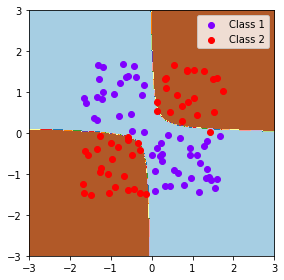

In [15]:
classifier = MSeClassifier(x=data, z=z, b=b)
_ = classifier.fit(sol='algebra', kernel='quadratic')

labels = np.copy(z)
labels[labels==1] = 0
labels[labels==-1] = 1
plotBoundByDecisionFunction(data, labels, classifier.predict, inc=0.01, augmented=True)

## Gradient Descent Method

**Linear Case**

In [16]:
data = []
z = []
with open('./datasets/synthetic1_train.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        p1, p2, label = row[0].split(',')
        p1, p2, label = float(p1), float(p2), int(label)
        data.append([1, p1, p2+5]) # augmented data
        z.append(label if label==1 else -1)
data = np.array(data)
z = np.array(z)
b = np.array([1 for _ in range(len(data))]) # b could be any as long as larger than zero

In [17]:
classifier = MSeClassifier(x=data, z=z, b=b)
_ = classifier.fit(max_epoch=1000, sol='GD')

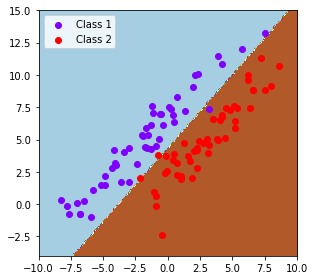

In [18]:
labels = np.copy(z)
labels[labels==1] = 0
labels[labels==-1] = 1
plotBoundByDecisionFunction(data, labels, classifier.predict, augmented=True)

**Nonlinear Case**

In [19]:
data = []
z = []
with open('./XOR.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in list(spamreader)[1:]:
        x0, x1, label = map(float, row[0].split(','))
        data.append([1, x0, x1])
        z.append(1 if int(label)==1 else -1)
data = np.array(data)
z = np.array(z)
b = np.array([1 for _ in range(len(data))])

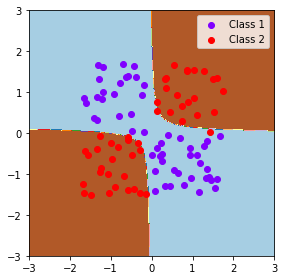

In [20]:
classifier = MSeClassifier(x=data, z=z, b=b)
_ = classifier.fit(max_epoch=1000, sol='GD', kernel='quadratic')

labels = np.copy(z)
labels[labels==1] = 0
labels[labels==-1] = 1
plotBoundByDecisionFunction(data, labels, classifier.predict, inc=0.01, augmented=True)